Melhores parâmetros: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 20}
Erro no teste: 0.3609271523178808
Erro no treino: 0.29373902867173785


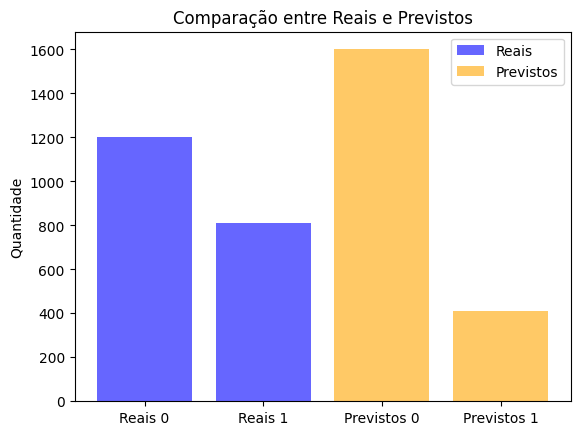

In [ ]:
import pandas as pd
from joblib import dump
from sklearn.calibration import LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor  # Importando o DecisionTreeRegressor
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('../water_potability.csv').dropna()

Y = df['Potability']
X = df.drop('Potability', axis=1)


pca = PCA(n_components=8)
pca.fit(X)
pca = pca.fit_transform(X)

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size= 0.15 ,random_state=42)

model = GridSearchCV(
    DecisionTreeClassifier(),  # Usando o classificador de árvore de decisão
    {
        'max_depth': [3, 5, 10, None],  # Variações de profundidade máxima da árvore
        'min_samples_split': [2, 10, 20],  # Variações de tamanho mínimo para dividir um nó
        'min_samples_leaf': [1, 5, 10],  # Variações do número mínimo de amostras em cada folha
    },
    n_jobs=4
)

model.fit(Xtrain, Ytrain)
print("melhores parâmetros :", model.best_params_)

model = model.best_estimator_
dump(model, 'model.plk')

Ypred = model.predict(X)
YTestPred = model.predict(Xtest)
YTrainPred = model.predict(Xtrain)

# Ypred = (Ypred > 0.5).astype(int)  # Aqui estamos convertendo para 0 ou 1, baseado em um threshold de 0.5

error_test = mean_absolute_error(YTestPred,Ytest)
error_train = mean_absolute_error(YTrainPred,Ytrain)

print(f"erro teste: {error_test}\nerro treino: {error_train}")

valores, cont_reais = np.unique(Y, return_counts=True)
_, cont_prev = np.unique(Ypred, return_counts=True)

plt.bar(["Reais 0", "Reais 1"], cont_reais, color='blue', alpha=0.6, label="Reais")
plt.bar(["Previstos 0", "Previstos 1"], cont_prev, color='orange', alpha=0.6, label="Previstos")

plt.ylabel("Quantidade")
plt.title("Comparação entre Reais e Previstos")
plt.legend()
plt.show()



